In [6]:
import numpy as np
import matplotlib.pyplot as plt
from configs import project_config
from configs.RecursiveVPSDE.Markovian_4DLorenz.recursive_Markovian_PostMeanScore_4DLorenz_T256_H05_tl_110data import \
    get_config as get_config_110
from configs.RecursiveVPSDE.Markovian_4DLorenz.recursive_Markovian_PostMeanScore_4DLorenz_T256_H05_tl_1100data import \
    get_config as get_config_1100

In [7]:
Nepoch = 960

/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/TSPM_mkv_4DLorenz_DriftEvalExp_960Nep_tl110data_10000DiffSteps


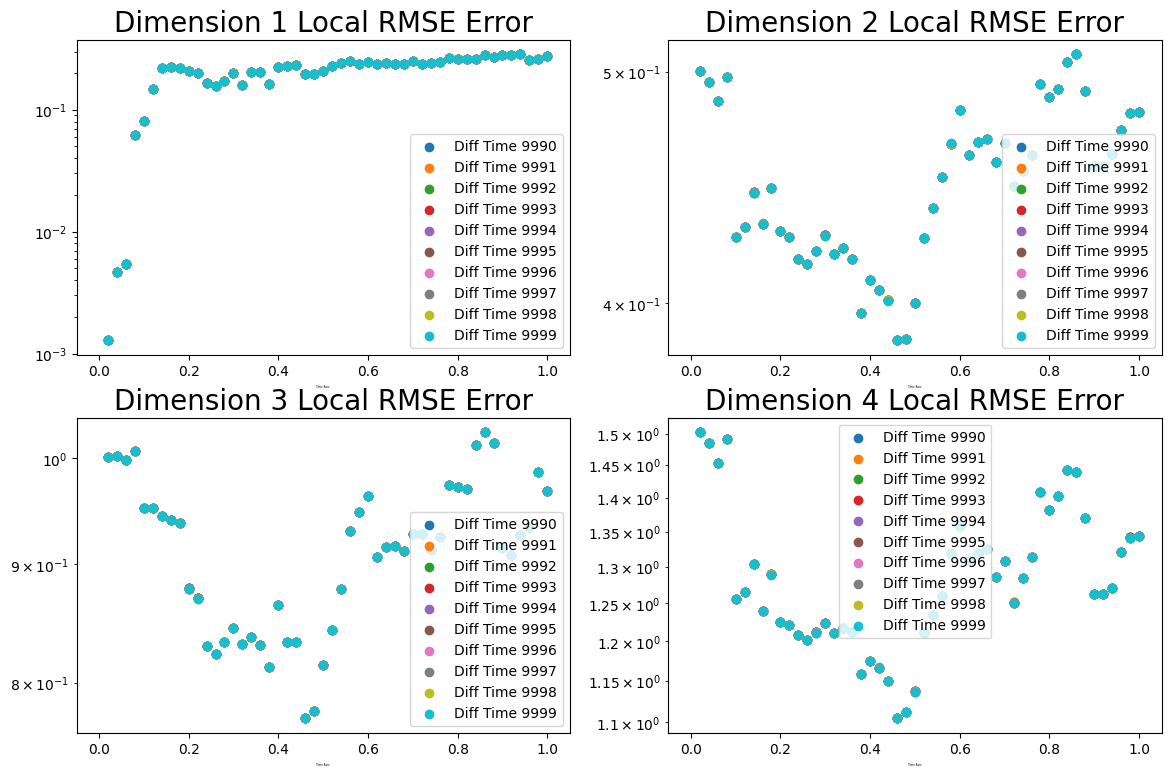

In [20]:
for get_config in [get_config_110]:
    config = get_config()
    save_path = (
            project_config.ROOT_DIR + f"experiments/results/TSPM_mkv_{config.ndims}DLorenz_DriftEvalExp_{Nepoch}Nep_tl{config.tdata_mult}data_{config.max_diff_steps}DiffSteps").replace(
        ".", "")
    print(save_path)
    true_states = np.load(save_path + "_true_states.npy")
    local_states= np.load(save_path + "_local_states.npy")
    local_errors = np.power(np.mean(np.power(true_states[np.newaxis,:] - local_states,2), axis=1), 0.5)
    fig, ax = plt.subplots(2,2, figsize=(14,9))
    for dim in range(local_errors.shape[2]):
        if dim == 0: i,j = 0,0
        elif dim == 1: i,j = 0,1
        elif dim == 2: i,j = 1, 0
        else: i,j = 1,1
        for difftime in range(990, local_errors.shape[0], 1):
            ax[i,j].scatter(np.linspace(0.,1.,local_errors.shape[1]), local_errors[difftime, :, dim], label=f"Diff Time {config.max_diff_steps - (local_errors.shape[0]-difftime)}")
            ax[i,j].set_title(f"Dimension {dim+1} Local RMSE Error", fontsize=20)
            ax[i,j].set_xlabel("Time Axis", fontsize=2)
            ax[i,j].legend()
    plt.show()
    plt.close()